In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, kaiserord, firwin, lfilter, freqz
from scipy.fft import fft, fftfreq

In [ ]:
fs = 2000
f1, f2 = 50, 300
delta_p = 0.1
delta_s = 60
transition_width = 30
numtaps = 201

wp = 1 / (10 ** (delta_p / 20))
ws = 1 / (10 ** (delta_s / 20))


In [64]:
bands = [0, f1 - transition_width, f1, f2, f2 + transition_width, fs / 2]
desired = [0, 1, 0]
weights = [ws, wp, ws]

taps = remez(numtaps, bands, desired, weight=weights, fs=fs)

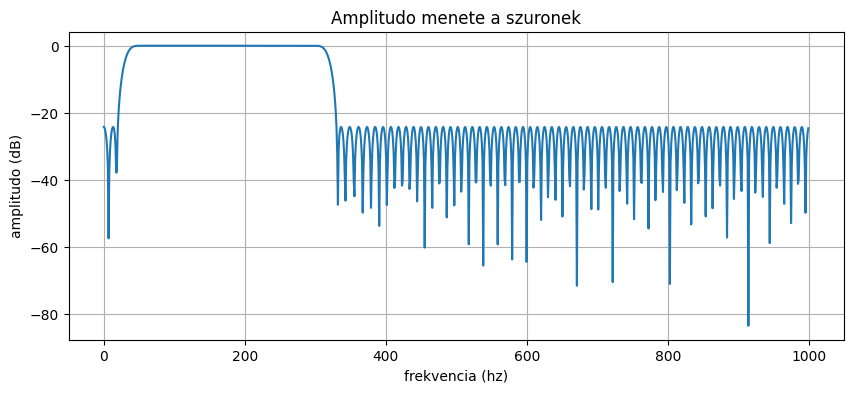

In [65]:
w, h = freqz(taps, worN=1024, fs=fs)
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.grid()
plt.xlabel("frekvencia (hz)")
plt.ylabel("amplitudo (dB)")
plt.title("Amplitudo menete a szuronek")
plt.show()

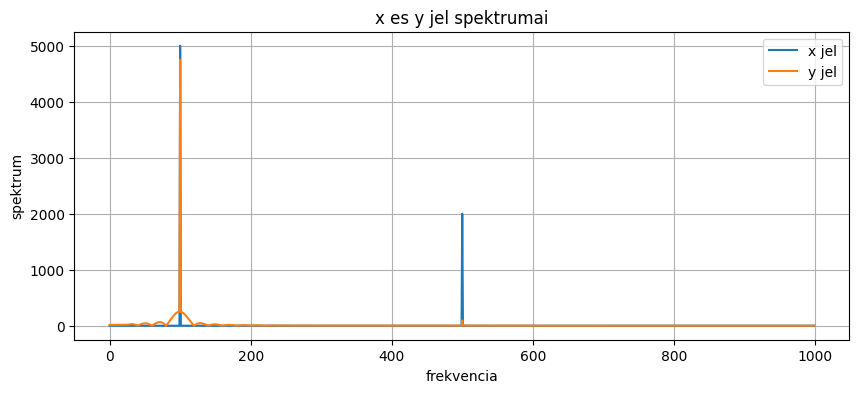

In [66]:
t = np.arange(0, 1, 1 / fs)

x = 5 * np.sin(200 * np.pi * t) + 2 * np.sin(1000 * np.pi * t)

y = lfilter(taps, 1.0, x)

def plot_spectrum(signal, fs, title):
    n = len(signal)
    f = fftfreq(n, d=1/fs)[:n//2]
    spectrum = np.abs(fft(signal))[:n//2]
    plt.plot(f, spectrum, label=title)

plt.figure(figsize=(10, 4))
plot_spectrum(x, fs, "x jel")
plot_spectrum(y, fs, "y jel")
plt.legend()
plt.grid()
plt.xlabel("frekvencia")
plt.ylabel("spektrum")
plt.title("x es y jel spektrumai")
plt.show()